<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Comparing Clustering Algorithm Effectiveness

_Authors: Tim Book (DC), Kiefer Katovich (SF)_

---

In this lab, you'll test three of the clustering algorithms we've covered on seven data sets that are specifically designed to evaluate clustering algorithm effectiveness.

This lab is exploratory and heavy on data visualization.


In [171]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use('fivethirtyeight')

%matplotlib inline

---

### 1) Load the data sets.

Each of the seven data sets have three columns:

    x
    y
    label
    
Because they each only have two variables, they're easy to examine visually. You’ll compare the “true” labels for the data to the clusters the algorithms find.

In [172]:
flame = pd.read_csv('./datasets/flame.csv')
agg = pd.read_csv('./datasets/aggregation.csv')
comp = pd.read_csv('./datasets/compound.csv')
jain = pd.read_csv('./datasets/jain.csv')
path = pd.read_csv('./datasets/pathbased.csv')
r15 = pd.read_csv('./datasets/r15.csv')
spiral = pd.read_csv('./datasets/spiral.csv')

---

### 2) Plot each of the data sets with colored true labels.

The data sets have different numbers of unique labels, so you'll need to figure out how many there are for each and color the clusters accordingly (for example, `r15` has 15 different clusters).

You might find [this](https://matplotlib.org/examples/color/colormaps_reference.html) help page on colormaps useful!

In [173]:
agg.head()

x      y  label
0  15.55  28.65      2
1  14.90  27.55      2
2  14.45  28.35      2
3  14.15  28.80      2
4  13.75  28.05      2

In [174]:
# Plotting function.
# Plotting function should take (df, name) as arguments. `name` will be the plot's title.
def plot_clusters(df, name):
    sns.scatterplot(data=df, x='x', y='y', hue='label', palette='coolwarm_r')
    plt.title(name)
    plt.legend(loc='lower right')
    plt.show()

In [175]:
dfs = [
    (flame, 'flame'),
    (agg, 'agg'),
    (comp, 'comp'),
    (jain, 'jain'),
    (path, 'path'),
    (r15, 'r15'),
    (spiral, 'spiral')
]

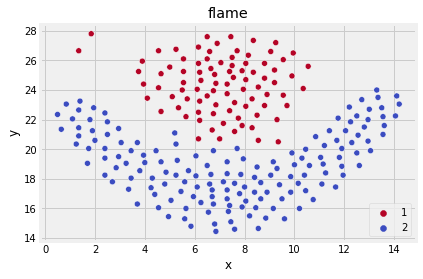

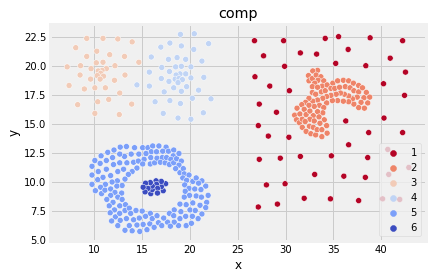

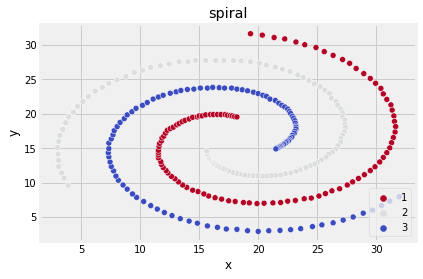

In [176]:
# Plot each data set with the true cluster labels.
[plot_clusters(df, name) for df, name in dfs];

---

### 3) Write a plotting function (or functions) to compare the performance of the three clustering algorithms.

Load in the three clustering algorithms we covered earlier in the class.

    K-means: k-means clustering.
    Agglomerative clustering: hierarchical clustering (bottom up).
    DBSCAN: density-based clustering.
    
Your function(s) should allow you to visually examine the effects of changing different parameters in the clustering algorithms. The parameters you should explore, at minimum, are:

    K-means:
        n_clusters
    Agglomerative clustering:
        n_clusters
    DBSCAN
        eps
        min_samples
        
Feel free to explore other parameters for these models.


In [259]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore') # Ensuring the notebook remains tidy

### But first: Let's write a function that scales our data for us.
Why do we need to scale our data for clustering algorithms? (thread)

In [217]:
# Write your function to scale data here.
def scale_matrix(X):
    ss = StandardScaler()
    X_scaled = ss.fit_transform(X)
    return X_scaled

In [179]:
# Write a function that will plot the results of the three
# clustering algorithms for comparison.

# Your function should take TWO INPUTS:
# 1 - The data
# 2 - The clusterer

# Your function should do TWO THINGS:
# 1 - Print the SILHOUETTE SCORE for your clusters
# 2 - Plot the clusteres with appropriate coloring

def plot_results(df, cl):
    # Scale data
    X_sc = scale_matrix(df.drop(['label'], axis=1))
    
    if cl == 'km':
        km = KMeans(n_clusters=len(df['label'].unique()))
        km.fit(X_sc) # Fit clusterer
        print(f'K-Means: {silhouette_score(X_sc, km.labels_)}') # Print Silhouette Score
        sns.scatterplot(data=df, x='x', y='y', hue=km.labels_, palette='coolwarm_r')
        plt.show()
    
    elif cl == 'agg':
        agg = AgglomerativeClustering(n_clusters=len(df['label'].unique()))
        agg.fit(X_sc) # Fit clusterer
        print(f'Agg-Clustering: {silhouette_score(X_sc, agg.labels_)}') # Print Silhouette Score
        sns.scatterplot(data=df, x='x', y='y', hue=agg.labels_, palette='coolwarm_r')
        plt.show()
        
    elif cl == 'dbscan':
        dbscan = DBSCAN(eps=0.2)
        dbscan.fit(X_sc) # Fit clusterer
        print(f'DBSCAN: {silhouette_score(X_sc, dbscan.labels_)}') # Print Silhouette Score
        sns.scatterplot(data=df, x='x', y='y', hue=dbscan.labels_, palette='coolwarm_r')    
        plt.show()
    
    else:
        print("Error! Fix code")

## 4) Tinkering with clustering parameters.

In the following sections, look at how the parameters affect the clustering algorithms and try to get clusters that make sense. There is no right answer here, as these are unsupervised techniques.

Don't forget to check out **silhouette scores!**

### 4.A) Find good parameters for the `flame` data set.

Which algorithm (visually) performs best?

In [180]:
cl_list = ['km', 'agg', 'dbscan']

K-Means: 0.3733173841508355


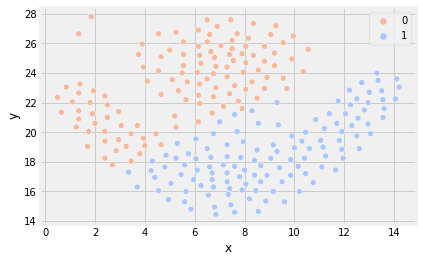

Agg-Clustering: 0.3524942517997597


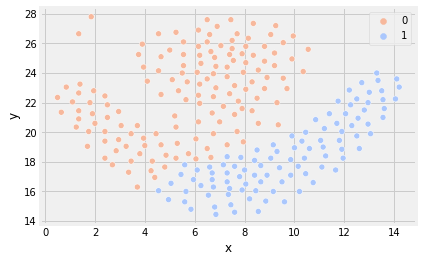

DBSCAN: -0.24773648264475165


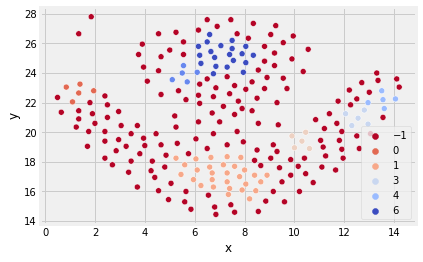

In [181]:
for cl in cl_list:
    plot_results(flame, cl)

K-Means and Agg-Clustering do a decent job here given their silhouette scores

---

### 4.B) Find good parameters for the `agg` data set.

Which algorithm (visually) performs best?

K-Means: 0.4680486001607906


Agg-Clustering: 0.4456446500640389


DBSCAN: 0.37039256879370025


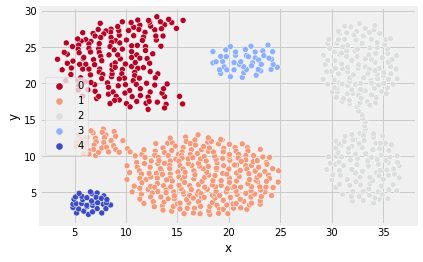

In [183]:
for cl in cl_list:
    plot_results(agg, cl)

All three models fare ok...

---

### 4.C) Find good parameters for the `comp` data set.

Which algorithm (visually) performs best?

K-Means: 0.4184867988757521


Agg-Clustering: 0.40553337601893963


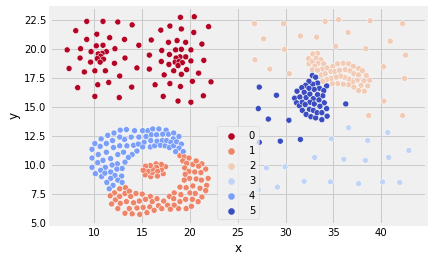

DBSCAN: 0.09220624950974617


In [185]:
for cl in cl_list:
    plot_results(comp, cl)

DBSCAN is really crappy here...

---

### 4.D) Find good parameters for the `jain` data set.

Which algorithm (visually) performs best?

K-Means: 0.5044779516212523


Agg-Clustering: 0.5042663862106481


DBSCAN: 0.18070946328608634


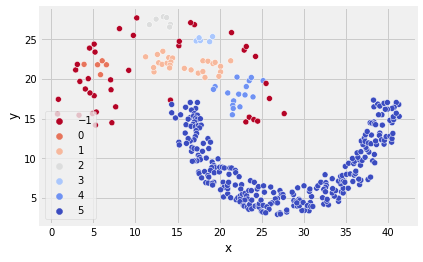

In [187]:
for cl in cl_list:
    plot_results(jain, cl)

Once again... DBSCAN stands out for the wrong reasons

---

### 4.E) Find good parameters for the `pathbased` data set.

Which algorithm (visually) performs best?

K-Means: 0.5092065033223903


Agg-Clustering: 0.5007977633074632


DBSCAN: 0.19305502571706398


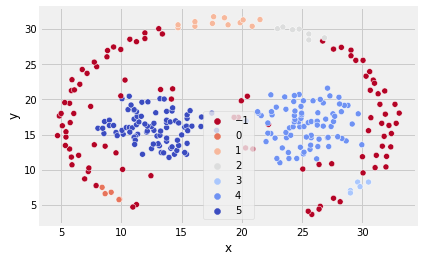

In [189]:
for cl in cl_list:
    plot_results(path, cl)

Ditto...

---

### 4.F) Find good parameters for the `r15` data set.

Which algorithm (visually) performs best?

K-Means: 0.7527351144186859


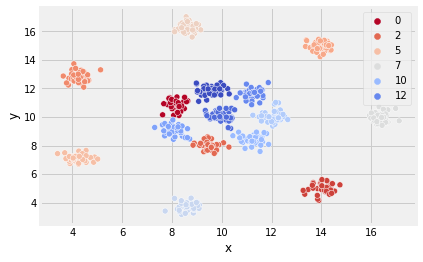

Agg-Clustering: 0.7495032842997014


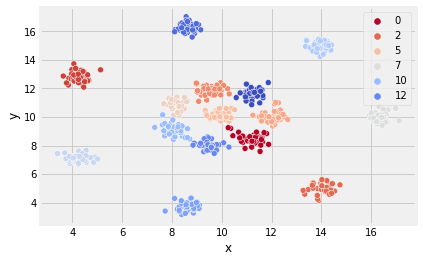

DBSCAN: 0.653006125666107


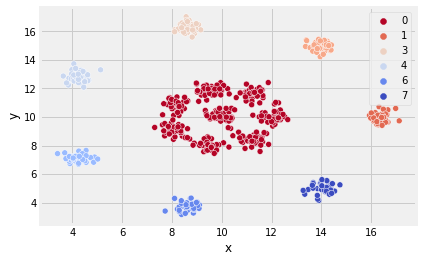

In [191]:
for cl in cl_list:
    plot_results(r15, cl)

All 3 models fare pretty well...

---

### 4.G) Find good parameters for the `spiral` data set.

Which algorithm (visually) performs best?

K-Means: 0.36034514534275974


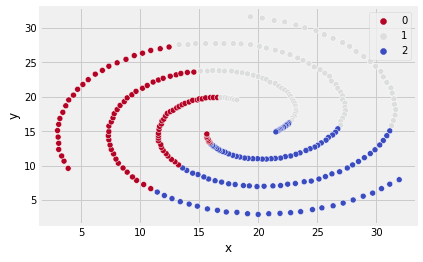

Agg-Clustering: 0.3277786301059895


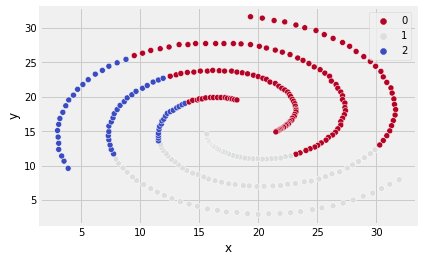

DBSCAN: -0.13658974664300386


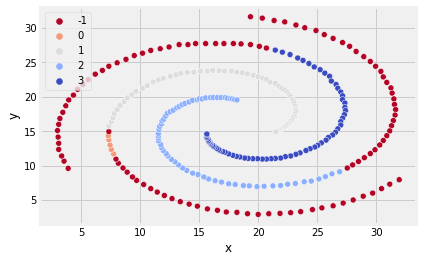

In [190]:
for cl in cl_list:
    plot_results(spiral, cl)

DBSCAN is shit...

## 5) Melbourne Housing
Data come from [this](https://www.kaggle.com/anthonypino/melbourne-housing-market) Kaggle page.

In [204]:
mel = pd.read_csv('datasets/melbourne.csv')
mel.head()

Suburb             Address  Rooms Type      Price Method SellerG  \
0  Abbotsford       68 Studley St      2    h        NaN     SS  Jellis   
1  Abbotsford        85 Turner St      2    h  1480000.0      S  Biggin   
2  Abbotsford     25 Bloomburg St      2    h  1035000.0      S  Biggin   
3  Abbotsford  18/659 Victoria St      3    u        NaN     VB  Rounds   
4  Abbotsford        5 Charles St      3    h  1465000.0     SP  Biggin   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  3/09/2016       2.5    3067.0  ...       1.0  1.0     126.0           NaN   
1  3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0           NaN   
2  4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0          79.0   
3  4/02/2016       2.5    3067.0  ...       2.0  1.0       0.0           NaN   
4  4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0         150.0   

   YearBuilt         CouncilArea Lattitude  Longtitude             Regionname  \
0        NaN  Yarra City Council  -37.8014    144.9958  Northern Metropolitan   
1        NaN  Yarra City Council  -37.7996    144.9984  Northern Metropolitan   
2     1900.0  Yarra City Council  -37.8079    144.9934  Northern Metropolitan   
3        NaN  Yarra City Council  -37.8114    145.0116  Northern Metropolitan   
4     1900.0  Yarra City Council  -37.8093    144.9944  Northern Metropolitan   

  Propertycount  
0        4019.0  
1        4019.0  
2        4019.0  
3        4019.0  
4        4019.0  

[5 rows x 21 columns]

### 5a) Fix bad variable names
We're only going to look at three variables here, and two of them are spelled wrong! Change the lat/long column names to either be spelled correctly or abbrevited as `lat`/`long`. While we're add it, let's change `Price` --> `price`.

In [205]:
columns_of_interest = ['Lattitude', 'Longtitude', 'Price']
mel_trim = mel[columns_of_interest]

# Rename columns
mel_trim.rename(columns={'Lattitude': 'lat', 'Longtitude': 'long', 'Price': 'price'}, inplace=True)

C:\Users\cheon\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


### 5b) Drop missings
Drop all rows where either `lat`, `long`, or `price` is missing.

In [206]:
mel_trim.dropna(inplace=True)

<ipython-input-206-5e39cf7e922c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mel_trim.dropna(inplace=True)


### 5c) Plot lat vs long
What kind of clustering do you want to do?

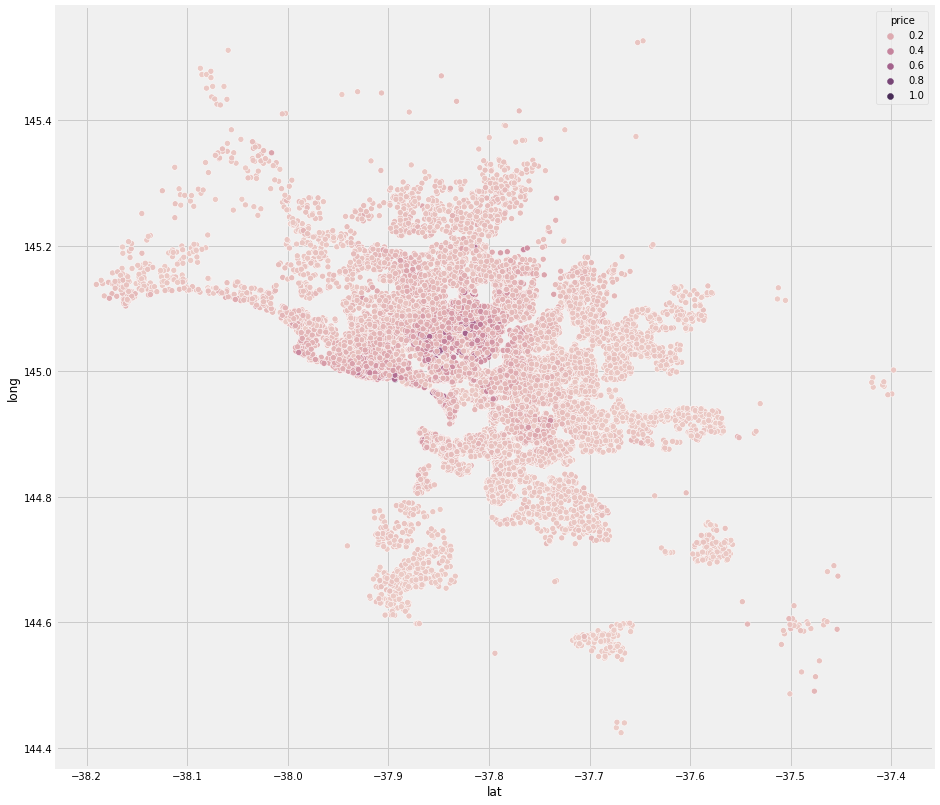

In [224]:
# Plotting
plt.subplots(figsize=(14,14))
sns.scatterplot(data=mel_trim, x='lat', y='long', hue='price')
plt.show()

### 5d) Prepare X matrix by scaling
Why do we need to scale? (thread)

In [250]:
X = mel_trim
X_sc = ss.fit_transform(mel_trim)

**Answer**: As clustering models are always based on distance, we do not want the magnitude of our features to affect our algorithm. This is why scaling is always required!

### 5e) Cluster and plot clusters

#### K-means

No. of clusters: 2, Silhouette score: 0.33819704169227754


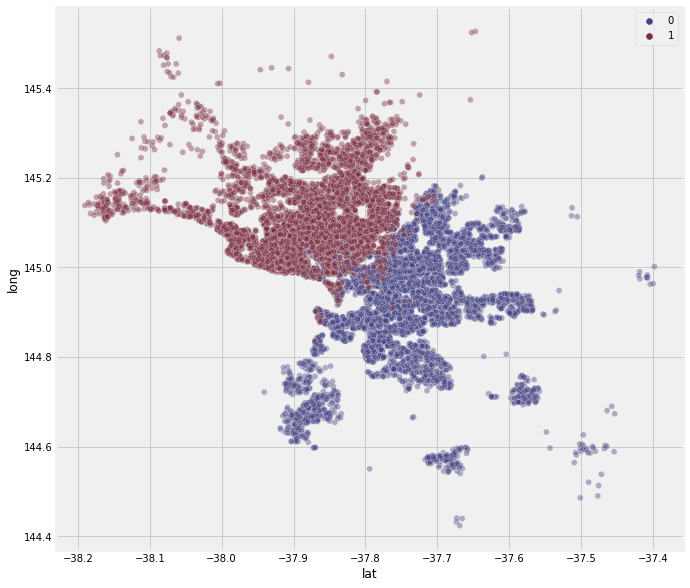

No. of clusters: 4, Silhouette score: 0.28621197132594695


No. of clusters: 8, Silhouette score: 0.2806351919146207


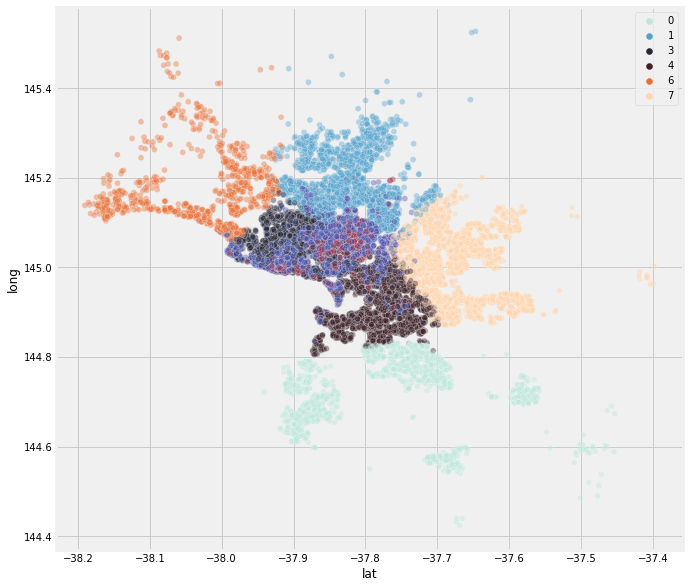

No. of clusters: 10, Silhouette score: 0.3051125775761301


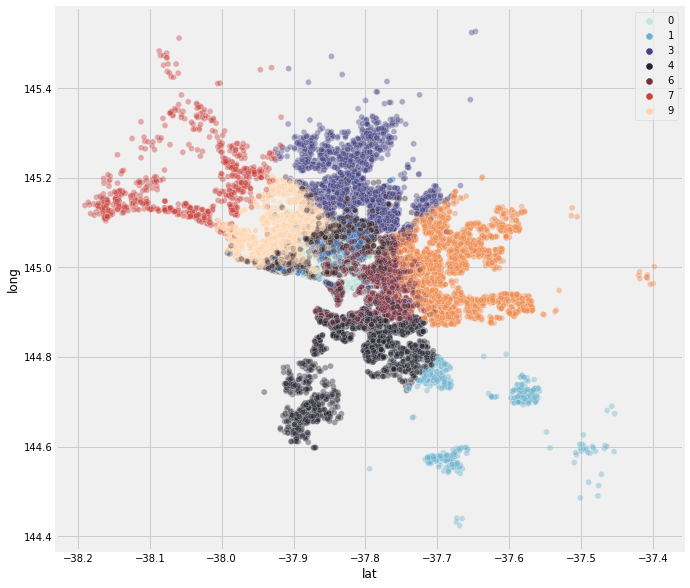

No. of clusters: 20, Silhouette score: 0.29215783465958334


No. of clusters: 40, Silhouette score: 0.298843217510397


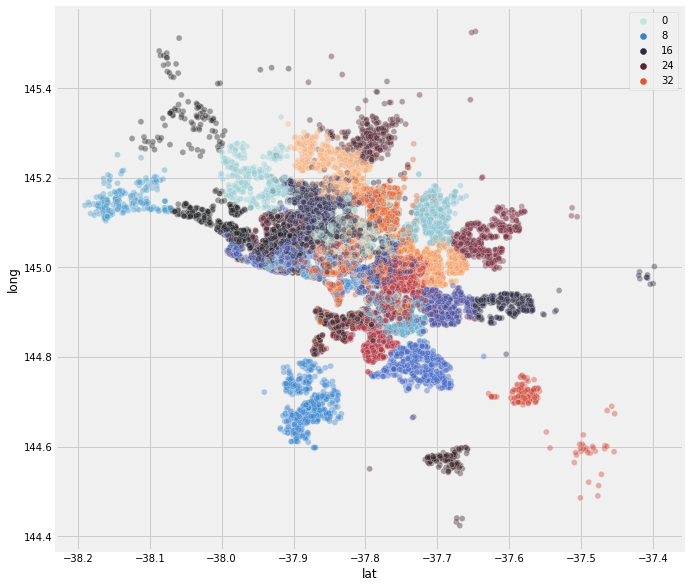

Wall time: 54.4 s


In [297]:
%%time

random_state=42
for i in [2, 4, 8, 10, 20, 40]:
    km = KMeans(n_clusters=i)
    km.fit(X_sc)
    print(f'No. of clusters: {i}, Silhouette score: {silhouette_score(X_sc, km.labels_)}')
    
    plt.subplots(figsize=(10, 10))
    sns.scatterplot(data=X, x='lat', y='long', hue=km.labels_, alpha=0.4, palette='icefire')
    plt.show()

#### DBSCAN

EPS: 0.5, Silhouette score: 0.37846337867660074


EPS: 0.6, Silhouette score: 0.4260476307935328


EPS: 0.7, Silhouette score: 0.4286304152942855


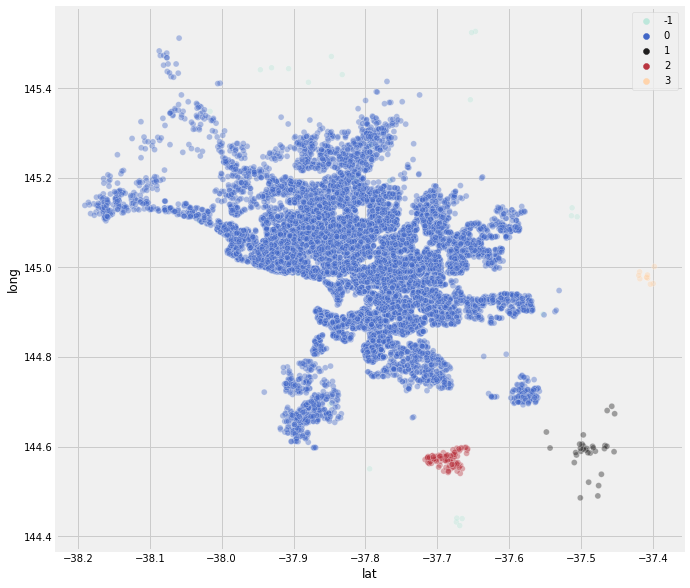

EPS: 0.8, Silhouette score: 0.5170148519529845


EPS: 1.0, Silhouette score: 0.5181202850574134


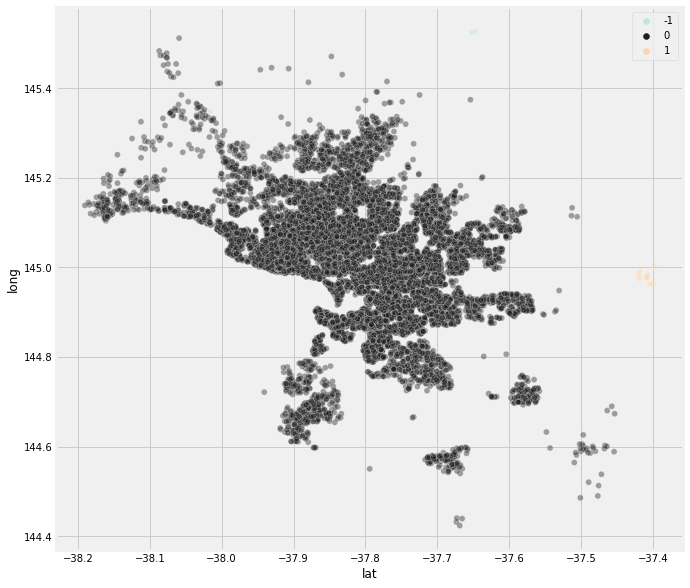

Wall time: 49.4 s


In [298]:
%%time
for i in [0.5, 0.6, 0.7, 0.8, 1.0]:
    dbscan = DBSCAN(eps=i)
    dbscan.fit(X_sc)
    print(f'EPS: {i}, Silhouette score: {silhouette_score(X_sc, dbscan.labels_)}')
    
    plt.subplots(figsize=(10, 10))
    sns.scatterplot(data=X, x='lat', y='long', hue=dbscan.labels_, alpha=0.4, palette='icefire')
    plt.show()

In [236]:
# mel.plot(
#     kind='scatter',
#     x='long',
#     y='lat',
#     c='cluster',
#     colormap='Spectral',
#     s=2,
#     figsize=(8, 8)
# )

### 5f) Do prices differ by cluster?

In [299]:
km = KMeans(n_clusters=2)
km.fit(X_sc)

mel_trim['cluster'] = km.labels_
mel_trim.head()

lat      long      price  cluster
1 -37.7996  144.9984  1480000.0        0
2 -37.8079  144.9934  1035000.0        1
4 -37.8093  144.9944  1465000.0        0
5 -37.7969  144.9969   850000.0        1
6 -37.8072  144.9941  1600000.0        0

In [300]:
mel_trim.groupby('cluster').describe().round(2).T

cluster                0           1
lat   count      8940.00    12053.00
      mean        -37.87      -37.76
      std           0.08        0.07
      min         -38.19      -37.94
      25%         -37.92      -37.80
      50%         -37.86      -37.76
      75%         -37.82      -37.72
      max         -37.65      -37.40
long  count      8940.00    12053.00
      mean        145.08      144.93
      std           0.08        0.10
      min         144.83      144.42
      25%         145.02      144.88
      50%         145.07      144.94
      75%         145.12      145.00
      max         145.53      145.20
price count      8940.00    12053.00
      mean    1485122.96   796485.70
      std      775574.74   307675.76
      min      240000.00    85000.00
      25%      945000.00   575000.00
      50%     1340000.00   740000.00
      75%     1805000.00   960000.00
      max    11200000.00  2335000.00

KMeans looks like the better model here. There are some differences in average prices which may be emerging from latitude and longitude